# Tasks for laboratory assignment 2

In [ ]:
# imports section

# --- Базові бібліотеки для роботи з даними ---
import pandas as pd  # Для роботи з таблицями та структурованими даними
import numpy as np   # Для математичних операцій (матриці, вектори)
import string        # Містить списки знаків пунктуації, цифр тощо

# --- Бібліотеки для обробки тексту (NLP) ---
from nltk.corpus import stopwords          # Список "сміттєвих" слів (the, is, at), які не несуть змісту
from nltk.tokenize import word_tokenize, sent_tokenize # Інструменти для розбиття тексту на слова та речення
from nltk.stem import PorterStemmer, WordNetLemmatizer # Алгоритми для спрощення слів (running -> run)
from autocorrect import Speller            # Для автоматичного виправлення орфографічних помилок
import nltk                                # Основна бібліотека Natural Language Toolkit

# --- Бібліотеки для візуалізації ---
from wordcloud import WordCloud            # Генерує картинку "хмара слів"
import matplotlib.pyplot as plt            # Будує графіки (використовуємо для heatmap та виводу хмари)

# --- Бібліотеки для векторного представлення (Word Embeddings) ---
# (Використовуються для просунутого аналізу, завдання з "зірочкою")
import gensim as gs
from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec
import gensim.downloader as api

# --- Завантаження словників NLTK ---
# Це необхідно зробити один раз, щоб бібліотека мала бази даних слів
nltk.download('punkt')       # Модель для правильного розбиття на слова (токенізація)
nltk.download('wordnet')     # Величезний лексичний довідник для лематизації (розуміє зв'язки слів)
nltk.download('stopwords')   # Завантажує списки стоп-слів для різних мов

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zapon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zapon\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zapon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## Extract data from the json file 

Write a script, that would extract all the the data from the json file and return it in a list of texts for further use in the next tasks

In [ ]:
import json # Бібліотека для роботи з форматом JSON (JavaScript Object Notation)
import os   # Бібліотека для взаємодії з операційною системою (перевірка шляхів файлів)

def extract_texts_from_file(file_path):
    """
    Extract the text data from the json file.
    Функція зчитує JSON файл та повертає список текстів.
    """
    
    # --- Блок перевірки шляху (Error Handling) ---
    # VS Code іноді запускає код з кореня проєкту, а іноді з папки файлу.
    # Ця перевірка робить код надійним: якщо файлу немає в папці resources,
    # ми шукаємо його в поточній папці.
    if not os.path.exists(file_path):
        # Якщо не знайшло в папці resources, пробуємо шукати в корені
        file_path = 'data.json' # Пробуємо альтернативний шлях

    # --- Блок читання файлу ---
    # Конструкція 'with open' — це context manager. 
    # Вона гарантує, що файл буде закрито автоматично після читання, 
    # навіть якщо виникне помилка (це запобігає витоку пам'яті).
    # encoding='utf-8' — критично важливо для коректного відображення 
    # спецсимволів, емодзі або кирилиці.

    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f) # Парсинг JSON-структури у Python-словник (dict)
    # Повертаємо саме список текстів, який знаходиться за ключем 'texts'    
    return data['texts']

# Виклик функції
texts = extract_texts_from_file('resources/data.json')
print(f"Знайдено текстів: {len(texts)}")
print(texts[0]) # Друкуємо перший текст для перевірки

Знайдено текстів: 10
Oppenheimer, directed by Christopher Nolan, delves into the life of J. Robert Oppenheimer, the theoretical physicist who led the development of the atomic bomb. The film explores his moral and emotional struggles.


## Process the texts

Write a script, that would process these texts. Processing should include:

- Lowercasing
- Removing Punctuation
- Removing Special Characters and Numbers
- Stemming or Lemmatization
- Handling Abbreviations
- Spelling Correction

In [5]:
import nltk

# Завантажуємо базові токенізатори
nltk.download('punkt')
# У нових версіях NLTK (3.8+) часто потрібен ще й цей пакет:
nltk.download('punkt_tab') 
# Також переконаємося, що є інші необхідні ресурси
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zapon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\zapon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zapon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zapon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\zapon\AppData\Roaming\nltk_data...


True

In [17]:
import re # Regular Expressions (Регулярні вирази) — потужний інструмент для пошуку та заміни в тексті

def process_texts(texts):
    """
    Process the texts: lowercase, remove punctuation, stopwords, lemmatize.
    Основна функція очистки "сирого" тексту для перетворення його на зрозумілий для машини формат.
    """
    processed_list = []
    
    # --- Ініціалізація інструментів (Підготовка) ---
    # Створюємо об'єкт лематизатора (він буде перетворювати слова: 'running' -> 'run')
    lemmatizer = WordNetLemmatizer()
    
    # Завантажуємо список стоп-слів (the, a, is, in...) у множину (set).
    # Чому set? Бо пошук у множині ('in set') працює миттєво, на відміну від списку.
    stop_words = set(stopwords.words('english'))

    for text in texts:
        # КРОК 1: Lowercasing (Приведення до нижнього регістру)
        # Комп'ютер вважає "Apple" і "apple" різними словами. Ми робимо їх однаковими.
        text = text.lower()
        
        # КРОК 2: Cleaning (Видалення зайвих символів через Regex)
        # r'[^a-z\s]' означає: "замінити все, що НЕ є літерою (a-z) або пробілом (\s), на порожнечу".
        # Це прибирає коми, крапки, цифри, дужки тощо.
        text = re.sub(r'[^a-z\s]', '', text)
        
        # КРОК 3: Tokenization (Розбиття на слова)
        # Перетворюємо довгий рядок тексту на список окремих слів:
        # "hello world" -> ["hello", "world"]
        tokens = word_tokenize(text)
        
        clean_tokens = []
        for word in tokens:
            # КРОК 4: Stopwords Removal (Видалення шуму)
            # Якщо слово є в списку "сміттєвих" слів — ми його пропускаємо.
            if word not in stop_words:
                
                # КРОК 5: Lemmatization (Нормалізація)
                # Зводимо слово до словникової форми.
                # 'better' -> 'good', 'cats' -> 'cat'. Це зменшує кількість унікальних слів.
                lemma = lemmatizer.lemmatize(word)
                clean_tokens.append(lemma)
        
        # Збираємо очищені слова назад у рядок через пробіл
        processed_text = ' '.join(clean_tokens)
        processed_list.append(processed_text)

    return processed_list

# --- Запуск та перевірка ---
texts_processed = process_texts(texts)
print("Оброблений текст (приклад):", texts_processed[0])

Оброблений текст (приклад): spacex design manufacture launch advanced rocket spacecraft


## Visualize as cloud of words

Visualize the texts as a cloud of words.

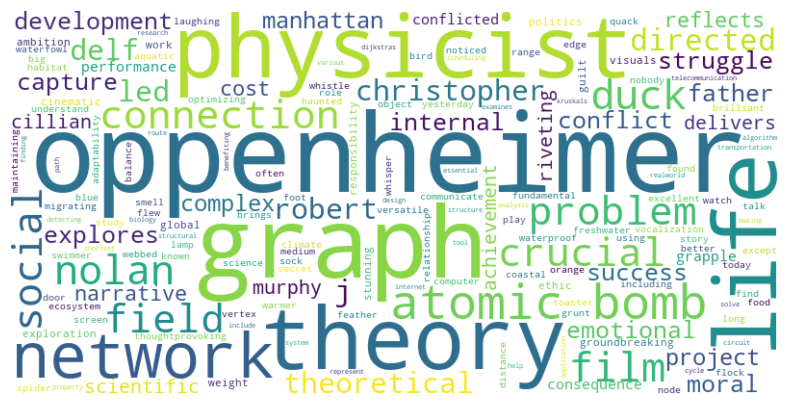

In [7]:
def visualize_texts(texts_processed):
    """
    Visualize the texts as cloud of words.
    Створює візуалізацію, де розмір слова залежить від частоти його використання.
    """
    
    # КРОК 1: Підготовка даних
    # Бібліотека WordCloud не вміє працювати зі списком ['text1', 'text2'].
    # Їй потрібен один великий суцільний рядок (string).
    # Метод .join() "зшиває" всі елементи списку через пробіл.
    combined_text = ' '.join(texts_processed)
    
    # КРОК 2: Налаштування та генерація
    # Створюємо об'єкт WordCloud із параметрами:
    # - background_color='white': білий фон (краще для друку/звітів).
    # - width/height: розмір картинки в пікселях.
    # .generate(combined_text): ця функція сама рахує частоту слів і малює їх.
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
    
    # КРОК 3: Відображення (Matplotlib)
    # Створюємо "полотно" (figure) розміром 10 на 5 дюймів.
    plt.figure(figsize=(10, 5))
    
    # .imshow() (Image Show) — відображає дані як зображення.
    # interpolation='bilinear' — робить літери більш гладкими, розмиваючи пікселі,
    # щоб картинка не виглядала "квадратною" при розтягуванні.
    plt.imshow(wordcloud, interpolation='bilinear')
    
    # .axis('off') — прибирає осі координат (цифри 0, 100, 200 по краях),
    # бо для хмари слів вони не мають сенсу і тільки псують вигляд.
    plt.axis('off') 
    
    # Фінальна команда, яка малює вікно з графіком.
    plt.show()

# Запуск функції
visualize_texts(texts_processed)

## Calculate cosine similarities using TFIDF

Calculate the TFIDF score and cosine similarity between the texts. You may use gensim, write your own script using numpy or use other module. Output the result as a matrix $n\times n$ of cosine similarity scores (where $n$ is the length of texts list).

**Extra credit**: use word2vec word embeddings in vector spaces to get better TFIDF scores by representing each word as a vector.

In [13]:
%pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB 325.1 kB/s eta 0:00:28
   ---------------------------------------- 0.0/8.9 MB 326.8 kB/s eta 0:00:28
   ---------------------------------------- 0.1/8.9 MB 363.1 kB/s eta 0:00:25
    --------------------------------------- 0.1/8.9 MB 554.9 kB/s eta 0:00:16
    --------------------------------------- 0.1/8.9 MB 554.9 kB/s eta 0:00:16
    --------------------------------------- 0.1/8.9 MB 448.2 kB/s eta 0:00:20
    --------------------------------------- 0.2/8.9 MB 562.0 kB/s eta 0:00:16
   - -------------------------------------- 0.3/8.9 MB 628.5 kB/s eta 0:00:14
   - --------------------------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # Інструмент для перетворення тексту в матрицю чисел
from sklearn.metrics.pairwise import cosine_similarity      # Функція для порівняння цих матриць

def calculate_tfidf(texts_processed):
    """
    Calculate TFIDF score and cosine similarity between the texts.
    Вираховує важливість слів та знаходить ступінь схожості між текстами.
    """
    
    # КРОК 1: Ініціалізація векторизатора
    # TfidfVectorizer робить дві речі:
    # 1. Рахує, скільки разів слово зустрічається в тексті (Term Frequency).
    # 2. Зменшує вагу слів, які зустрічаються всюди (типу "people", "make"), 
    #    і збільшує вагу рідкісних слів (типу "quantum", "pizza").
    vectorizer = TfidfVectorizer()
    
    # КРОК 2: Створення матриці "Текст-Слова"
    # fit_transform робить таке:
    # - fit: вчить словник усіх слів з усіх текстів.
    # - transform: перетворює кожен текст на набір цифр (вектор).
    # Результат (tfidf_matrix) — це таблиця, де рядки — це тексти, а стовпці — це слова.
    tfidf_matrix = vectorizer.fit_transform(texts_processed)
    
    # КРОК 3: Розрахунок схожості (Cosine Similarity)
    # Ми беремо вектори (стрілочки в багатовимірному просторі) і міряємо кут між ними.
    # Якщо кут 0 градусів (стрілки в один бік) — схожість 1.0 (максимум).
    # Якщо кут 90 градусів (стрілки перпендикулярні) — схожість 0.0 (нічого спільного).
    # Функція повертає матрицю розміром N x N.
    cosine_sim = cosine_similarity(tfidf_matrix)
    
    return cosine_sim

# --- Виклик та перевірка результатів ---
cosine_matrix = calculate_tfidf(texts_processed)

# shape показує розмір матриці (наприклад, (10, 10), якщо у нас 10 текстів).
print("Розмір матриці:", cosine_matrix.shape) 

# Показуємо число від 0 до 1. Чим ближче до 1, тим схожіші тексти.
print("Приклад схожості першого тексту з другим:" ,cosine_matrix[0][1])

Розмір матриці: (10, 10)
Приклад схожості першого тексту з другим: 0.2021375532261779


## Visualize data

Visualize the `cosine_matrix` data using matplotlib. Choose your own method of plotting the scores in a way, that the similarity indeces between texts would be instantly visible. Plot data about texts as well (a couple of first words in the document).

*Hint: remember heat maps, aren't they nice for this task?*

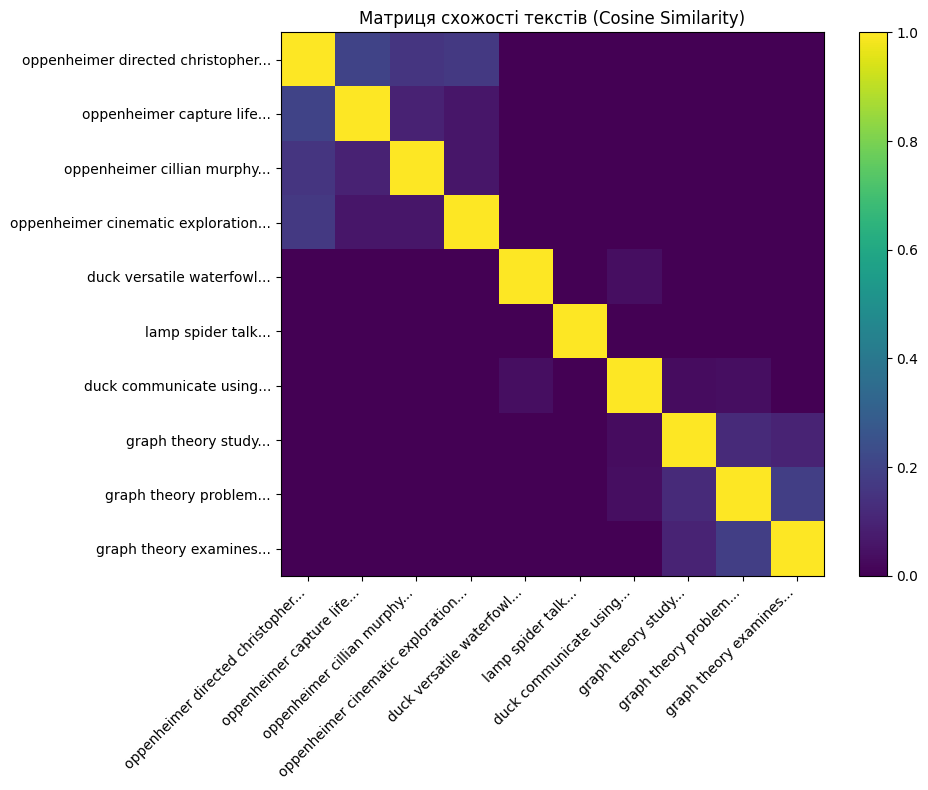

In [ ]:
import matplotlib.pyplot as plt # Найпопулярніша бібліотека для графіків у Python

def visualize_data(cosine_matrix, texts_processed):
    """
    Visualize the cosine similarity matrix using a heatmap.
    Малює теплову карту, де колір показує ступінь схожості між текстами.
    """
    
    # КРОК 1: Створення "полотна"
    # fig — це весь малюнок, ax — це конкретний графік (осі) на ньому.
    # figsize=(10, 8) задає розмір картинки в дюймах (ширина, висота).
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # КРОК 2: Малювання теплової карти (Heatmap)
    # .imshow() відображає матрицю чисел як кольорове зображення.
    # cmap='viridis' — це кольорова схема (від фіолетового до жовтого).
    # Фіолетовий (0) = несхожі, Жовтий (1) = ідентичні.
    cax = ax.imshow(cosine_matrix, cmap='viridis')
    
    # КРОК 3: Додавання шкали кольорів (Legend)
    # Це стовпчик справа, який показує, якому числу відповідає який колір.
    plt.colorbar(cax)
    
    # КРОК 4: Підготовка підписів осей
    # Якщо виводити весь текст, графік буде нечитабельним.
    # Тому ми беремо тільки перші 3 слова з кожного тексту + три крапки.
    # text.split()[:3] розбиває текст на слова і бере перші три.
    labels = [" ".join(text.split()[:3]) + "..." for text in texts_processed]
    
    # КРОК 5: Налаштування осей
    # Вказуємо, де саме мають стояти підписи (на кожному індексі від 0 до N).
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    
    # Підписуємо осі нашими скороченими текстами.
    # rotation=45 — повертаємо текст на 45 градусів, щоб він не налізав один на одного.
    # ha="right" (horizontal alignment) — вирівнюємо текст по правому краю для краси.
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_yticklabels(labels)
    
    # КРОК 6: Фінальні штрихи
    plt.title("Матриця схожості текстів (Cosine Similarity)")
    
    # .tight_layout() автоматично підганяє відступи, щоб підписи не обрізалися.
    plt.tight_layout()
    
    # Показуємо графік
    plt.show()

# Запуск візуалізації
visualize_data(cosine_matrix, texts_processed)

## Analyse your own text using TFIDF (or any other method)

Analyse your own text using previous methods. You may use API fetching to get text data, download texts from Kaggle or use any texts you want. Find cosine similarities and visualize them.

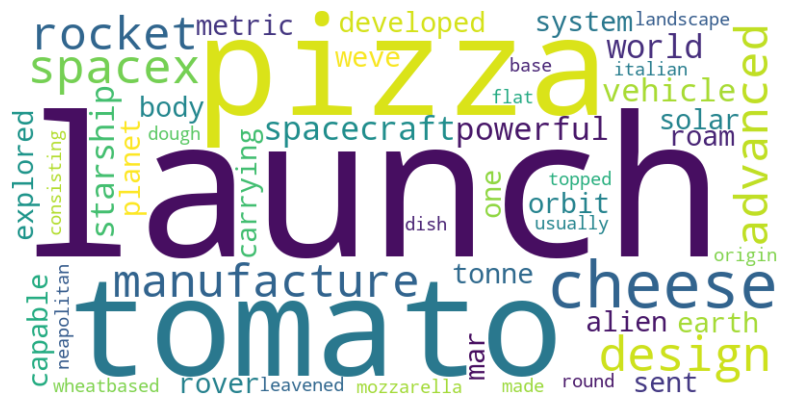

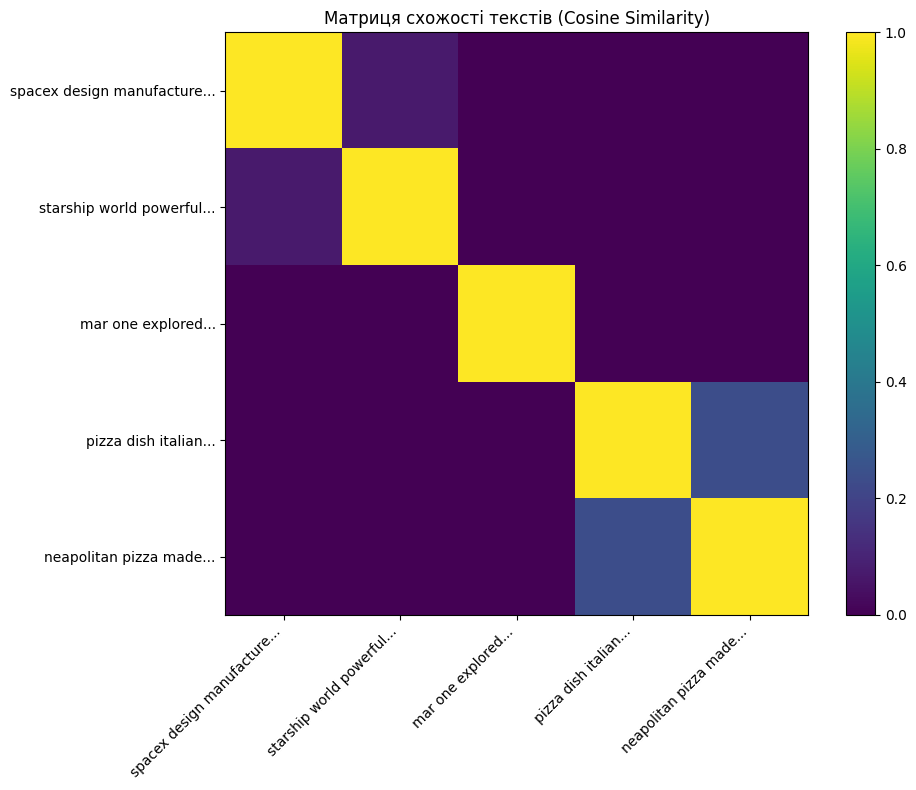

In [ ]:
def get_texts():
    """
    Get the texts you want to analyse.
    Генерує набір тестових даних для перевірки алгоритму.
    Ми беремо дві різні теми, щоб побачити контраст на графіку.
    """
    # --- Тема 1: Технології та Космос (SpaceX/NASA) ---
    text1 = "SpaceX designs, manufactures and launches advanced rockets and spacecraft."
    text2 = "Starship will be the world's most powerful launch vehicle ever developed, capable of carrying up to 150 metric tonnes to Earth orbit."
    text3 = "Mars is one of the most explored bodies in our solar system, and it's the only planet where we've sent rovers to roam the alien landscape."

    # --- Тема 2: Кулінарія (Піца) ---
    # Ці тексти не мають спільних слів з першою групою (крім стоп-слів, які ми видалимо).
    text4 = "Pizza is a dish of Italian origin consisting of a usually round, flat base of leavened wheat-based dough topped with tomatoes and cheese."
    text5 = "Neapolitan pizza is made with tomatoes and mozzarella cheese."
    
    # Повертаємо список (list), бо саме з таким форматом працюють наші функції process_texts та інші.
    return [text1, text2, text3, text4, text5]

# --- ЗАПУСК ПАЙПЛАЙНУ (PIPELINE) ---
# Ми викликаємо всі функції, які написали раніше, одну за одною.

# 1. Отримання сирих даних
texts = get_texts()

# 2. Очистка даних
# Тут "SpaceX" стане "spacex", зникнуть коми, слова приведуться до початкової форми.
texts_processed = process_texts(texts)

# 3. Візуалізація слів (WordCloud)
# Ми маємо побачити великі слова "pizza", "space", "rocket", "cheese".
visualize_texts(texts_processed)

# 4. Математичний розрахунок (TF-IDF + Cosine Similarity)
# Перетворюємо слова на цифри і рахуємо кути між векторами.
cosine_matrix = calculate_tfidf(texts_processed)

# 5. Фінальна візуалізація (Heatmap)
# Будуємо графік, де видно кластери (групи) схожих текстів.
visualize_data(cosine_matrix, texts_processed)